# Wine Project

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from pydataset import data

# # module for visualizations
# import viz_kmeans as vk

# my imports
import wrangle_lugo_copy as w

In [2]:
df = w.get_wine_data()

# NOTES

    - wine quality red:
        1,599 rows
        12 columns
    - wine quality white:
        4,898 rows
        12 columns
    - merged quality:
        6497 rows
        12 columns
        All columns are in float dtype with the exception of the quality
        
     

In [3]:
df = w.prep_wine_data(df)

In [ ]:
df.head().T

In [ ]:
df.info()

In [ ]:
df.wine_type.value_counts()

In [ ]:
# Provides an aggregated sum of nulls by column
    #the default axis = 0 : r0w
    #so it's summing all r0ws
df.isnull().sum()

In [ ]:
w.nulls_by_col(df)

In [ ]:
# Let's examine by row now!
    #now that we've changed the axis=1: co1
    #it's summing the columns

df.isnull().sum(axis=1)

In [ ]:
# list of columns
cols = ['fixed_acidity','volatile_acidity','citric_acid'
        ,'residual_sugar','chlorides','free_sulfur_dioxide'
       ,'total_sulfur_dioxide','density','ph','sulphates'
        ,'alcohol','quality','wine_type']

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(16,12))

#enumerate gives us the index of what we are iterating over
# as well as the iteration of the df.columns
for i, cols in enumerate(df.columns[:-1]):
    # print(i, cols)

    plt.subplot(3,4,i+1)
    sns.histplot(df[cols])

plt.suptitle('distribution of all my variables')
plt.show()

In [ ]:
plt.figure(figsize=(16, 12))

# list of columns
cols = ['fixed_acidity','volatile_acidity','citric_acid'
        ,'residual_sugar','chlorides','free_sulfur_dioxide'
       ,'total_sulfur_dioxide','density','ph','sulphates'
        ,'alcohol','quality','wine_type']

for i, col in enumerate(cols[:-1]):
    # i starts at 0, but plot no.s should start at 1
    plot_number = i+1
    
    # Create a subplot
    plt.subplot(3,4, plot_number)
    
    # Title with columns name
    plt.title(col)
    
    # Display histogram for column
    df[col].hist(grid=False, bins=10)
    
    # Hide gridlines
    plt.grid(False)

In [ ]:
#distribution of all my variables
plt.figure(figsize=(14,4))

for i, col in enumerate(train.columns[:-3]):
    plt.subplot(1,len(train.columns[:-3]),i+1)
    plt.hist(train[col], bins=20)
    plt.title(col)

In [22]:
df = w.get_wine_data()
df = w.prep_wine_data(df)

In [23]:
import corey_wrangle as cw

In [24]:
df = df.reset_index()
df = df.drop(columns = ['index'])
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [25]:
df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white_wine
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white_wine
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white_wine
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white_wine
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white_wine


In [7]:
df.shape

(6497, 13)

In [26]:
train, validate, test = cw.split_function(df)

Prepared df: (6497, 13)

Train: (3897, 13)
Validate: (1300, 13)
Test: (1300, 13)


In [27]:
col_list = list(df.drop(columns=['quality']).columns)
col_list

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'wine_type']

In [30]:
red_df = train[train.wine_type == 'red_wine']
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type
363,12.5,0.460,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2,5,red_wine
1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,red_wine
415,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3,5,red_wine
1432,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,6,red_wine
48,6.4,0.400,0.23,1.6,0.066,5.0,12.0,0.99580,3.34,0.56,9.2,5,red_wine


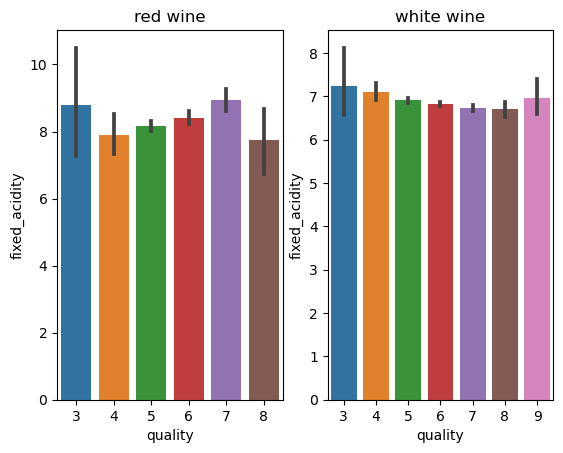

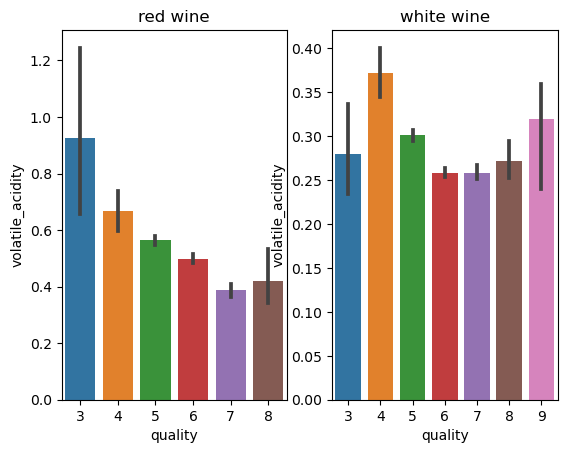

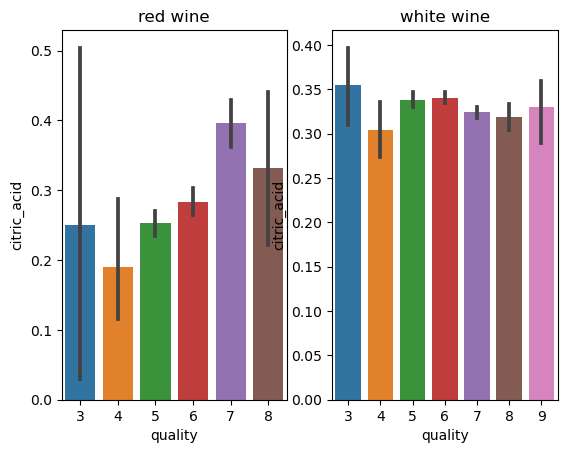

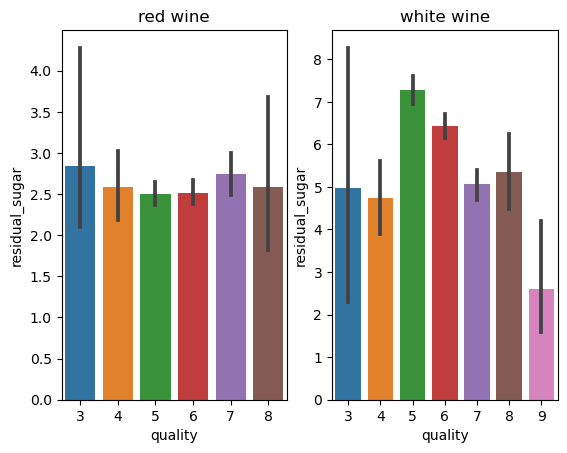

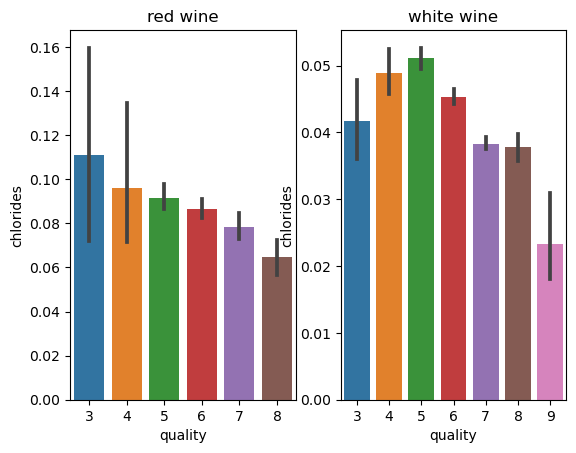

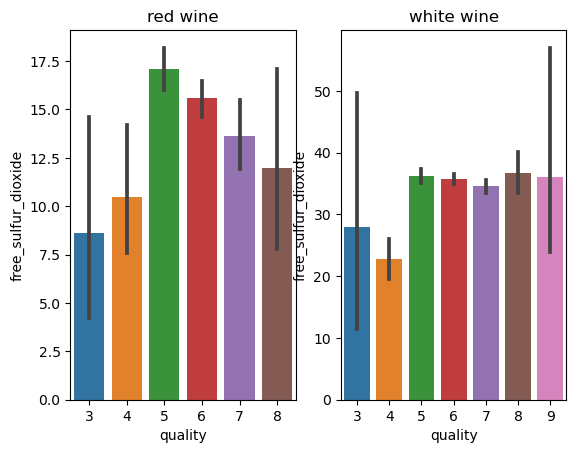

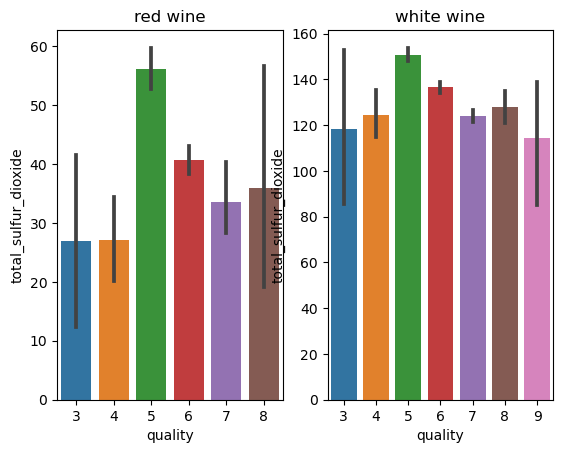

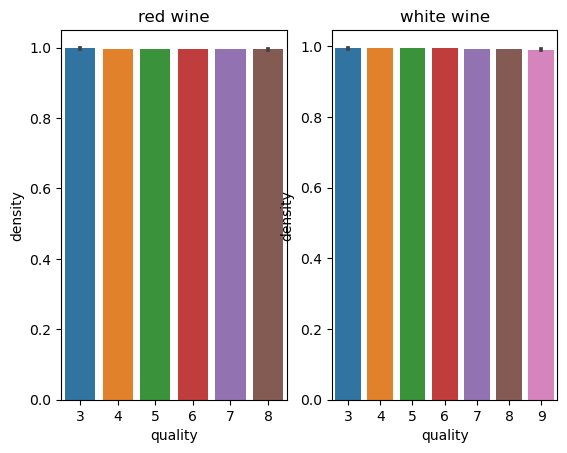

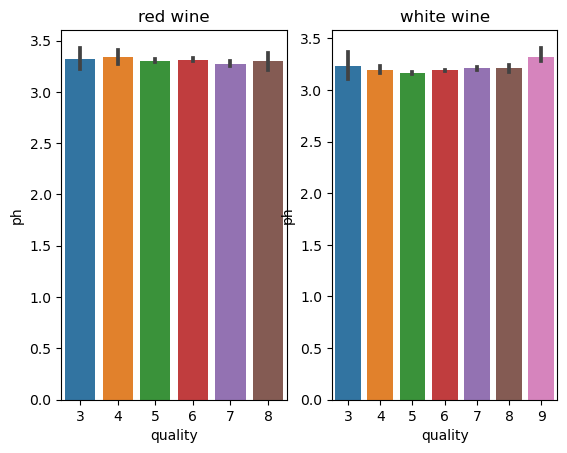

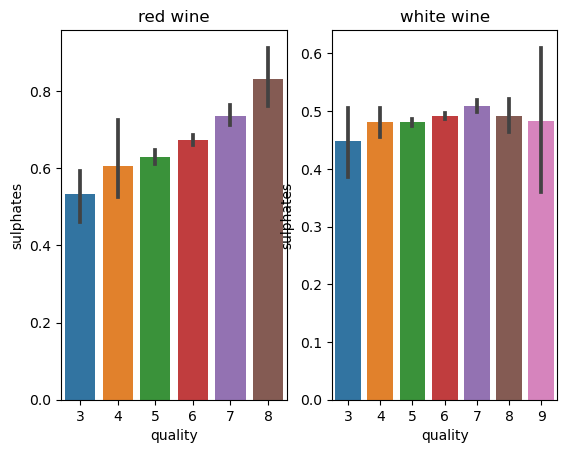

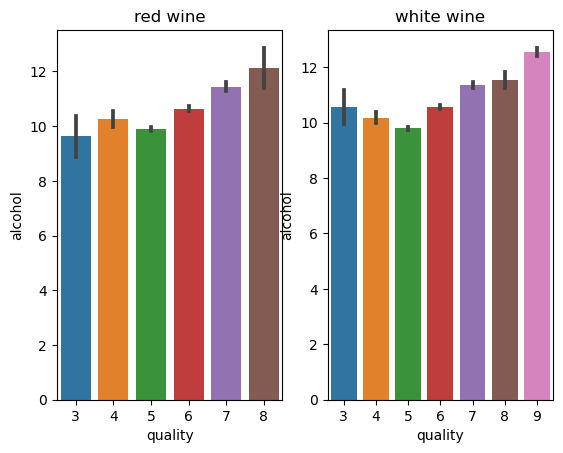

In [32]:
red_df = train[train.wine_type == 'red_wine']
white_df = train[train.wine_type == 'white_wine']
for col in col_list[:-1]:
    plt.subplot(1,2,1)
    sns.barplot(data = red_df, x='quality', y=col)
    plt.title('red wine')
    
    plt.subplot(1,2,2)
    sns.barplot(data = white_df, x='quality', y=col)
    plt.title('white wine')
    plt.show()

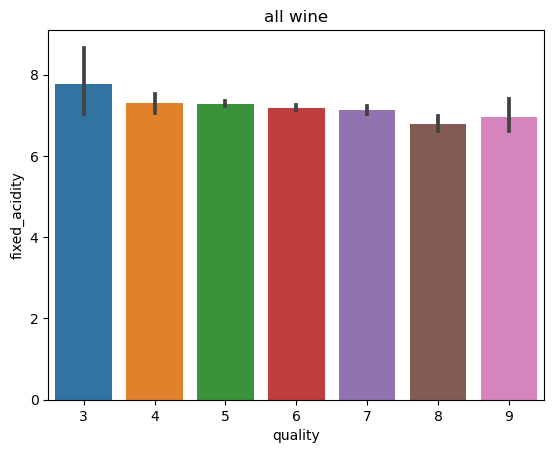

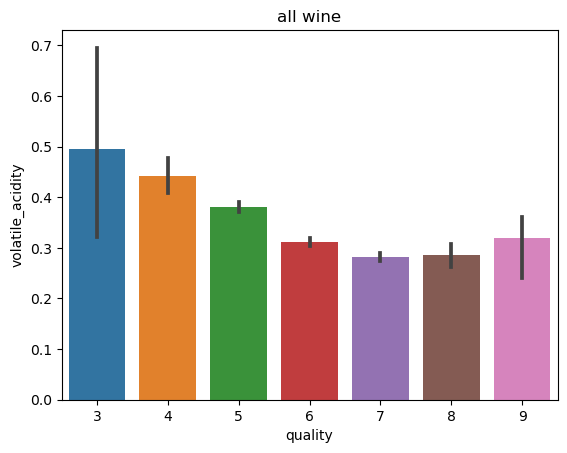

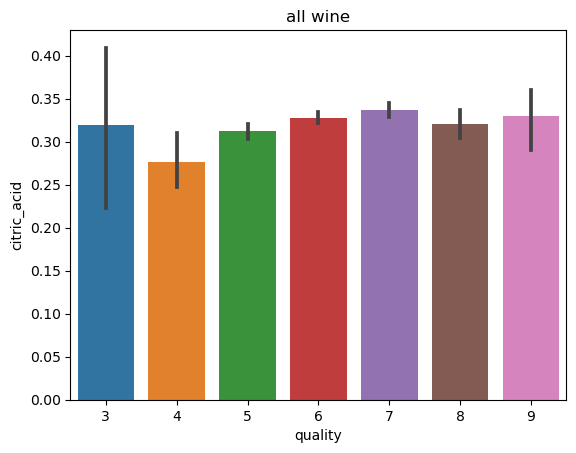

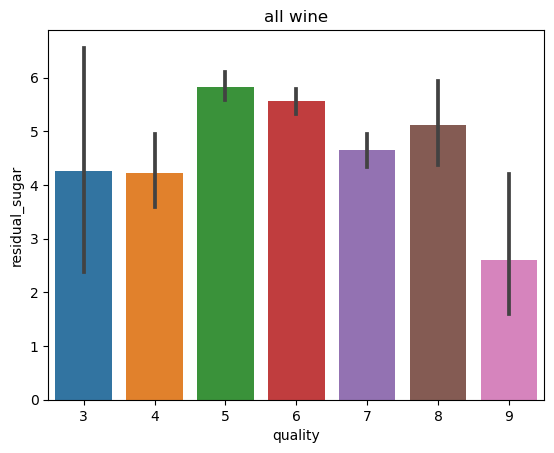

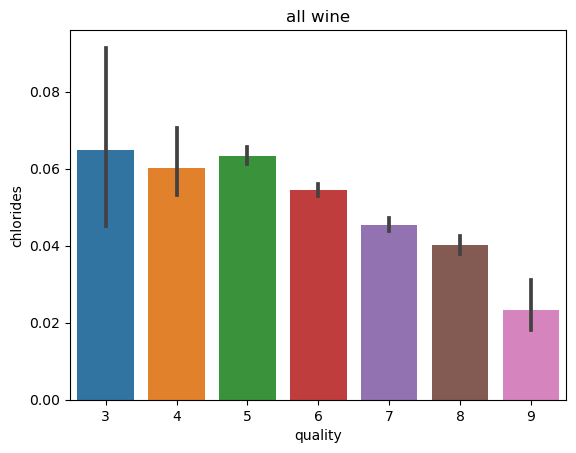

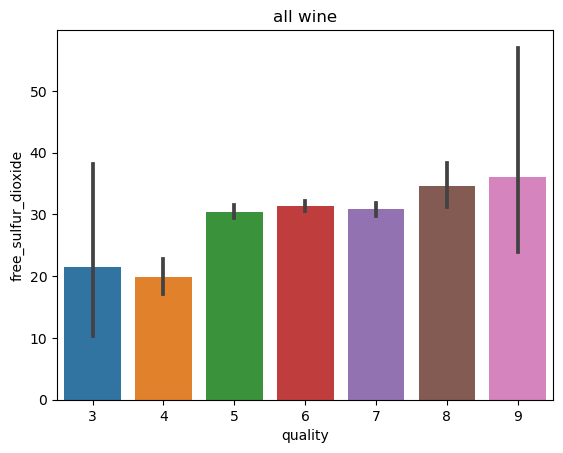

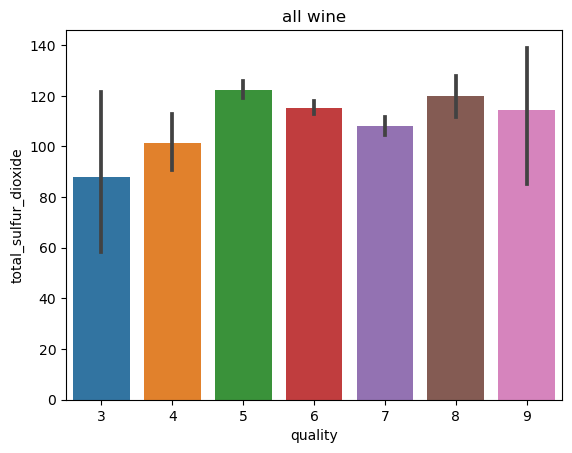

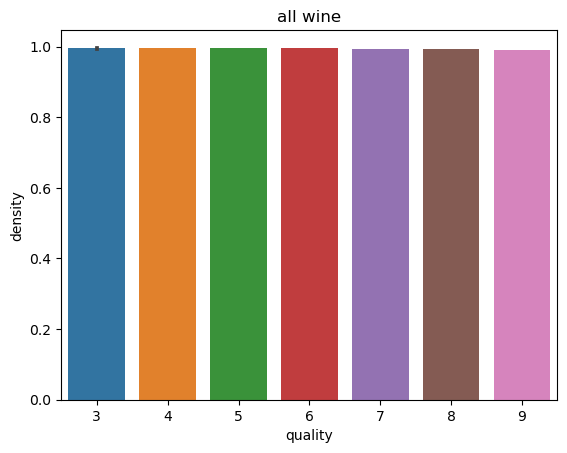

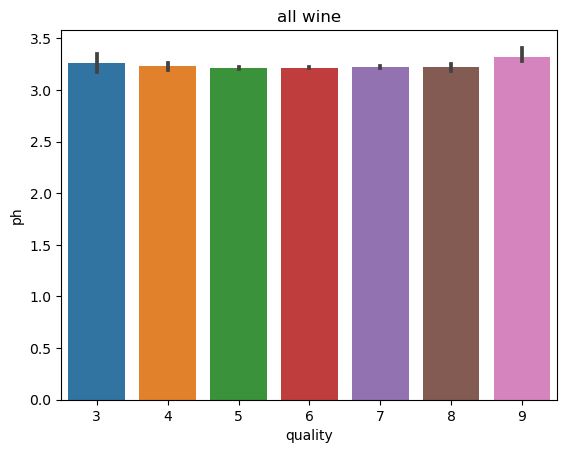

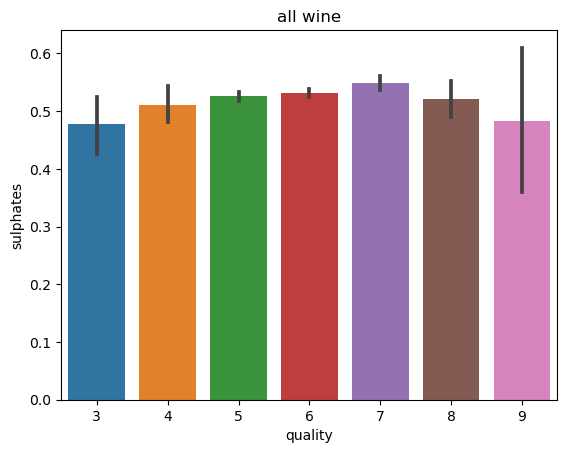

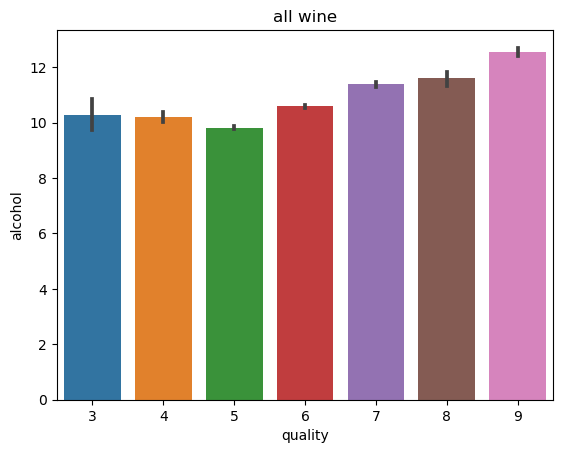

In [34]:

for col in col_list[:-1]:
    sns.barplot(data = train, x='quality', y=col)
    plt.title('all wine')
    plt.show()

In [35]:
train.density.describe()

count    3897.000000
mean        0.994682
std         0.003029
min         0.987110
25%         0.992300
50%         0.994860
75%         0.996920
max         1.038980
Name: density, dtype: float64

In [37]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type
5130,6.4,0.28,0.44,7.1,0.048,49.0,179.0,0.99528,3.15,0.48,9.2,5,white_wine
3064,7.0,0.20,0.74,0.8,0.044,19.0,163.0,0.99310,3.46,0.53,10.2,5,white_wine
4040,7.2,0.20,0.28,1.6,0.028,13.0,168.0,0.99203,3.17,1.06,11.5,6,white_wine
363,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2,5,red_wine
2950,6.5,0.37,0.33,3.9,0.027,40.0,130.0,0.99060,3.28,0.39,12.7,7,white_wine


In [ ]:
# remove_outliers is not working and I'm not sure why
# it returns more rows than it takes in
# will work on latger
# new_df = cw.remove_outliers(df, col_list)
# new_df.head()

In [ ]:
df.columns

In [ ]:
train.head()